Retail Sales Data Analysis Project

In [1]:
path = r"C:\Users\dell\Desktop\retail_sales_dataset.csv"
print(path)

C:\Users\dell\Desktop\retail_sales_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv(path, na_values=["", "NA"], keep_default_na=False)
df.head()

Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  11/24/2023     CUST001    Male   34           Beauty   
1               2   2/27/2023     CUST002  Female   26         Clothing   
2               3   1/13/2023     CUST003    Male   50      Electronics   
3               4   5/21/2023     CUST004    Male   37         Clothing   
4               5    5/6/2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount Month Name  Day Name age group  
0         3              50           150   November    Friday     25-34  
1         2             500          1000   February    Monday     25-34  
2         1              30            30    January    Friday     45-54  
3         1             500           500        May    Sunday     35-44  
4         2              50           100        May  Saturday     25-34

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split

In [4]:
df.head()

Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  11/24/2023     CUST001    Male   34           Beauty   
1               2   2/27/2023     CUST002  Female   26         Clothing   
2               3   1/13/2023     CUST003    Male   50      Electronics   
3               4   5/21/2023     CUST004    Male   37         Clothing   
4               5    5/6/2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount Month Name  Day Name age group  
0         3              50           150   November    Friday     25-34  
1         2             500          1000   February    Monday     25-34  
2         1              30            30    January    Friday     45-54  
3         1             500           500        May    Sunday     35-44  
4         2              50           100        May  Saturday     25-34

In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Month Name          0
Day Name            0
age group           0
dtype: int64

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

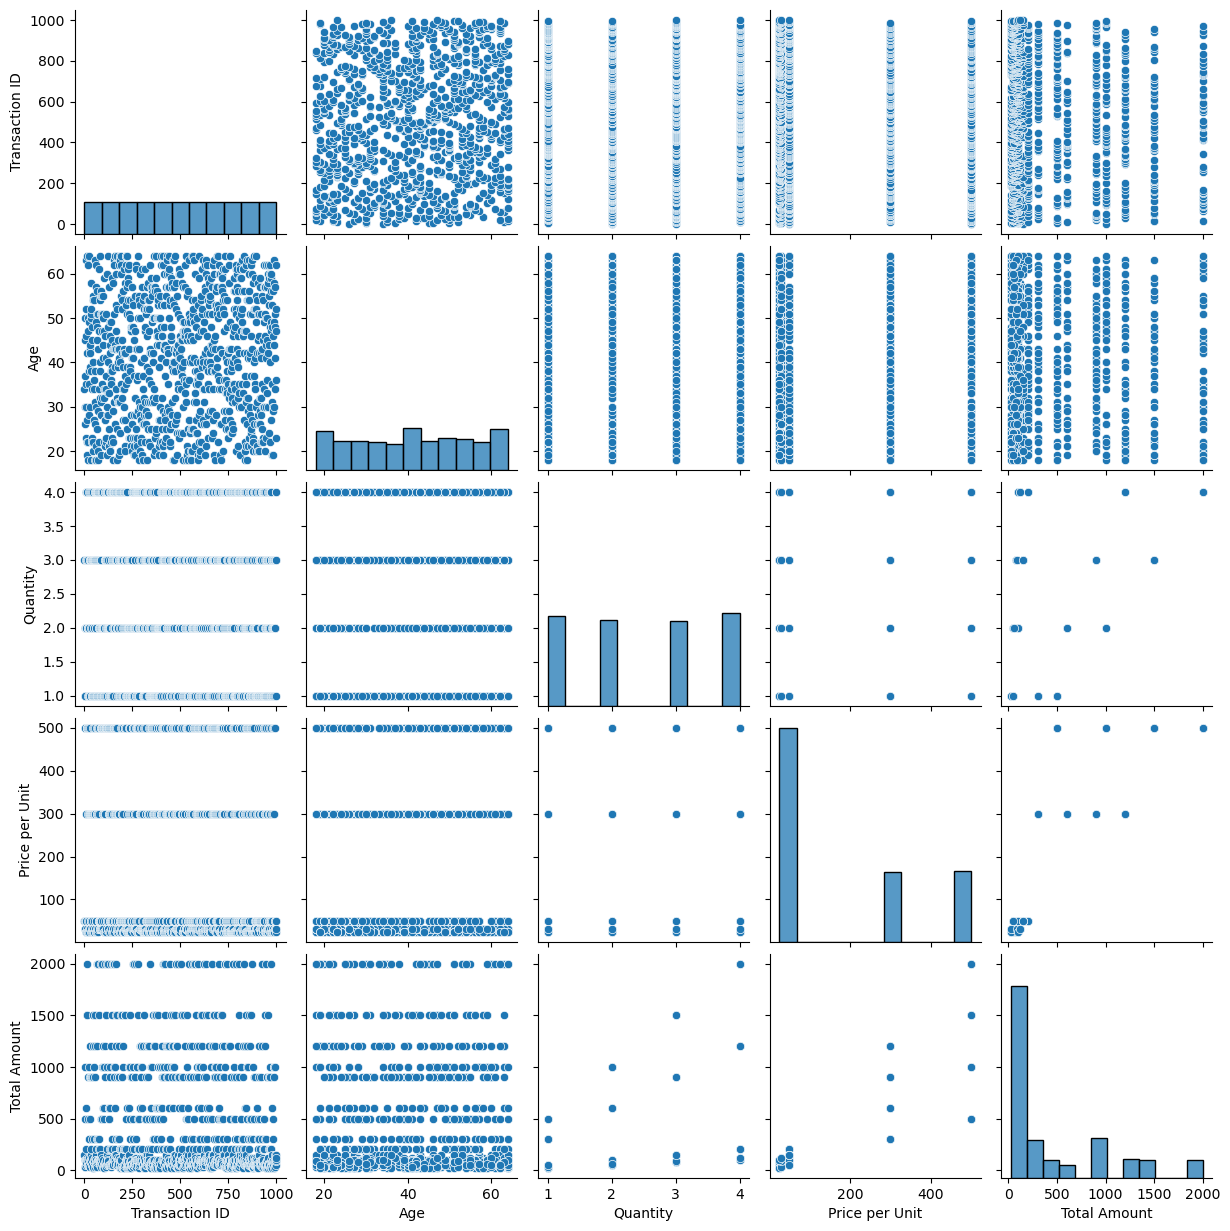

In [6]:
sns.pairplot(data=df)

In [7]:
df['Date']=pd.to_datetime(df['Date'])

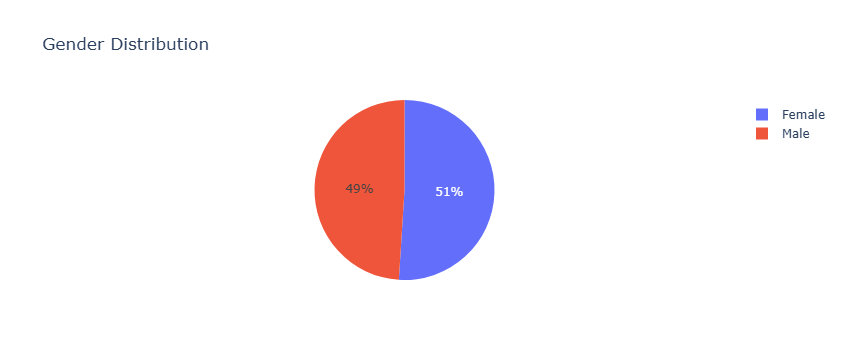

In [8]:
#Pie Chart
#Gender Distribution
df1 = df['Gender']
fig = px.pie(df1,
             names='Gender',
             title='Gender Distribution')
fig.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



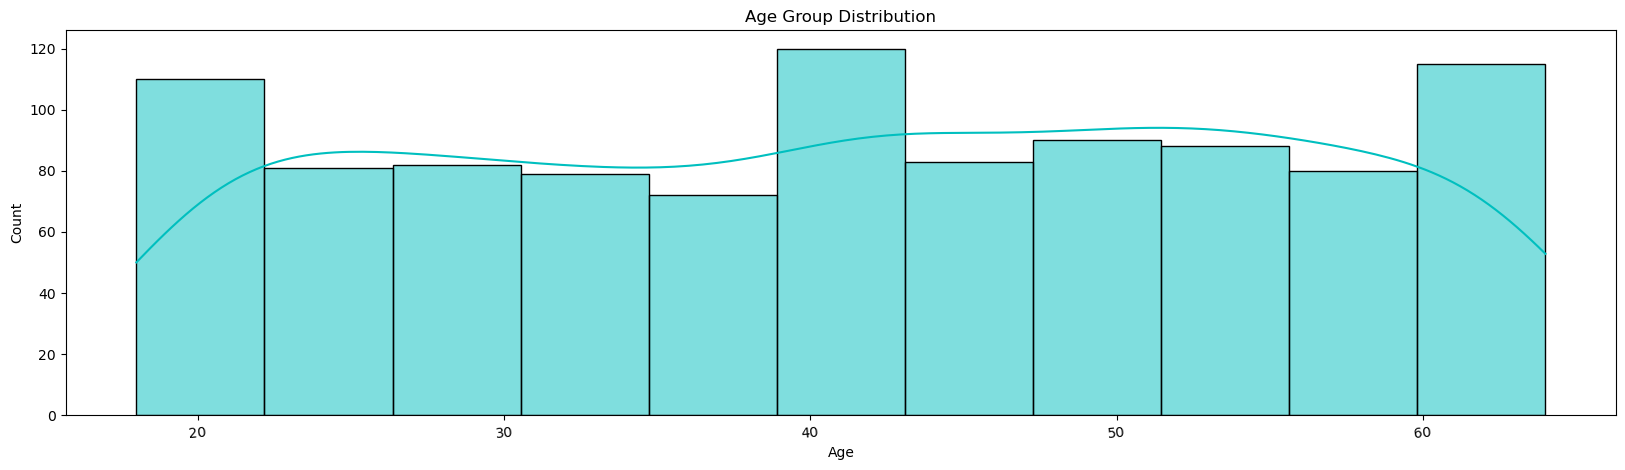

In [9]:
#Histogram Plot
#Age Group Distribution
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x=df['Age'].sort_values(),
             kde=True,
             color='c')
plt.title('Age Group Distribution')
plt.xticks(rotation=5)
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



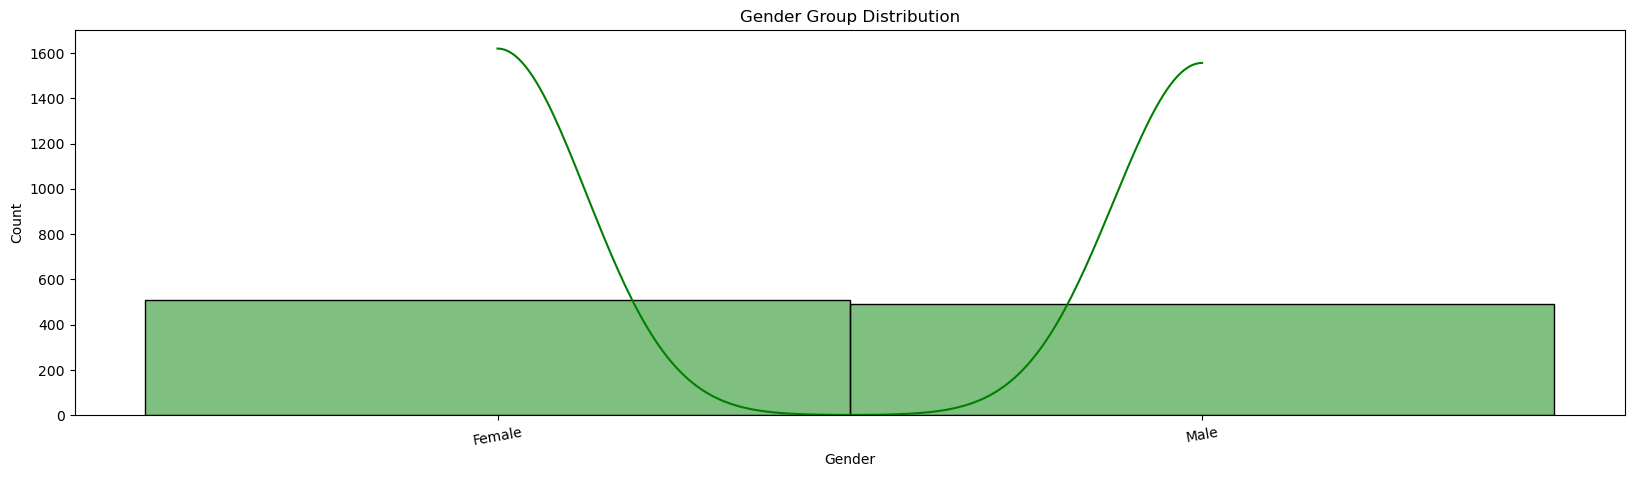

In [10]:
#Hist plot
#Gender Group Distribution
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x=df['Gender'].sort_values(),
             kde=True,
             color='g')
plt.title('Gender Group Distribution')
plt.xticks(rotation=10)
plt.show()

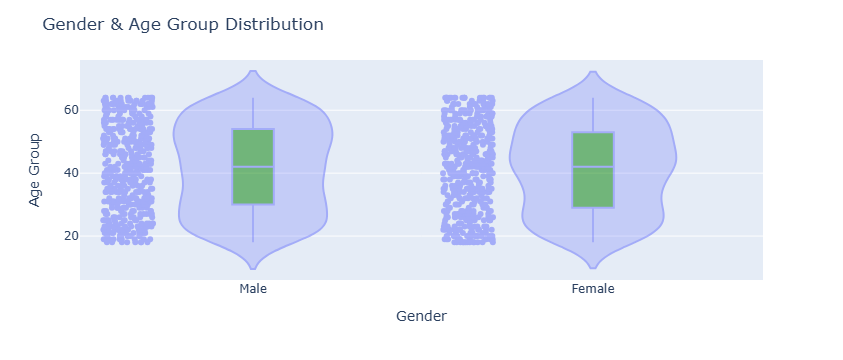

In [11]:
#Violin plot
#Gender & Age Group Distribution
plot = px.violin(x=df['Gender'],
                 y=df['Age'],
                 box=True,
                 points='all')
plot.update_traces(
    box_fillcolor='green',
    opacity=0.5
)
plot.update_layout(
    title='Gender & Age Group Distribution',
    xaxis_title='Gender',
    yaxis_title='Age Group'
)

plot.show()

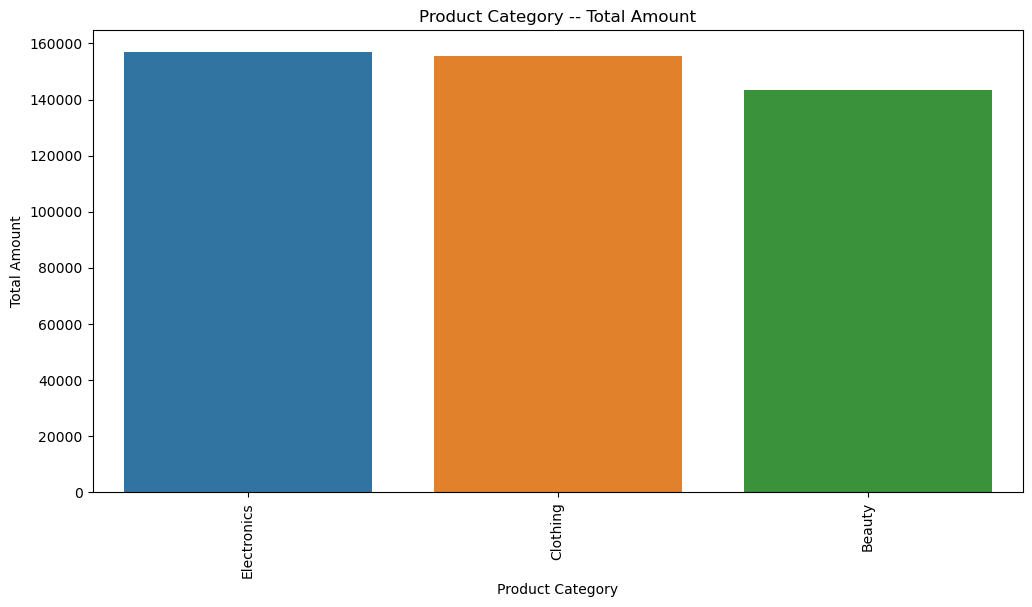

In [12]:
#Bar Plot
#Gold_Item_net_wt_sum
Gold_item_net_wt = df.groupby('Product Category')['Total Amount'].sum().nlargest(40)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=Gold_item_net_wt.index,
    y=Gold_item_net_wt.values)
plt.xticks(rotation=90)
plt.title("Product Category -- Total Amount")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

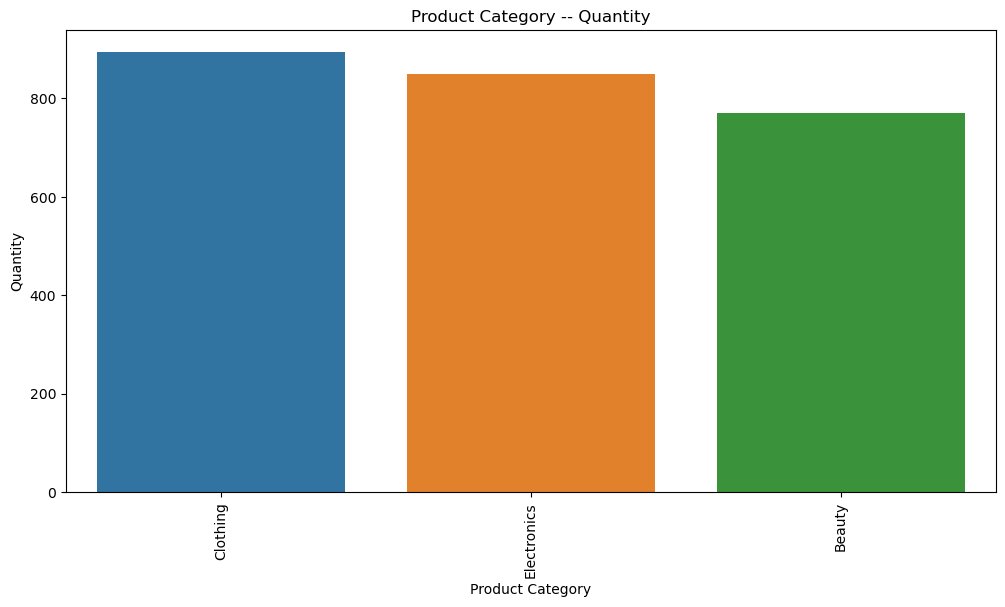

In [13]:
#Bar Plot
#Gold_Item_net_wt_sum
Gold_item_net_wt = df.groupby('Product Category')['Quantity'].sum().nlargest(40)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=Gold_item_net_wt.index,
    y=Gold_item_net_wt.values)
plt.xticks(rotation=90)
plt.title("Product Category -- Quantity")
plt.xlabel("Product Category")
plt.ylabel("Quantity")
plt.show()

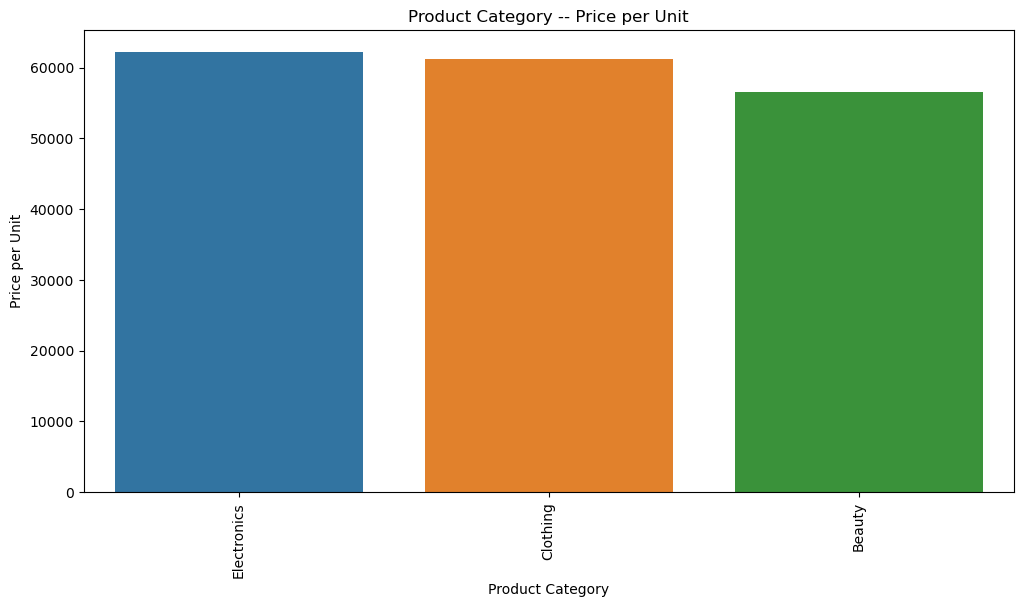

In [14]:
#Bar Plot
#Gold_Item_net_wt_sum
Gold_item_net_wt = df.groupby('Product Category')['Price per Unit'].sum().nlargest(40)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=Gold_item_net_wt.index,
    y=Gold_item_net_wt.values)
plt.xticks(rotation=90)
plt.title("Product Category -- Price per Unit")
plt.xlabel("Product Category")
plt.ylabel("Price per Unit")
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<function matplotlib.pyplot.show(close=None, block=None)>

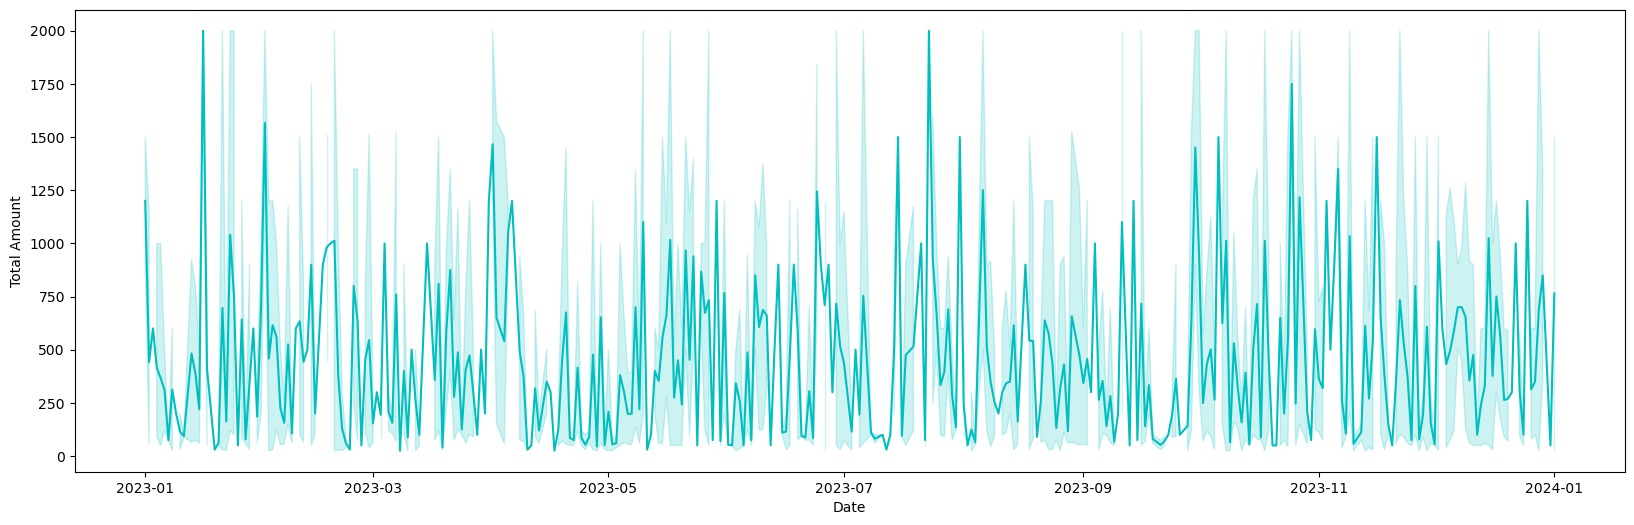

In [15]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x=df['Date'],y=df['Total Amount'],color='c')
plt.show

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<function matplotlib.pyplot.show(close=None, block=None)>

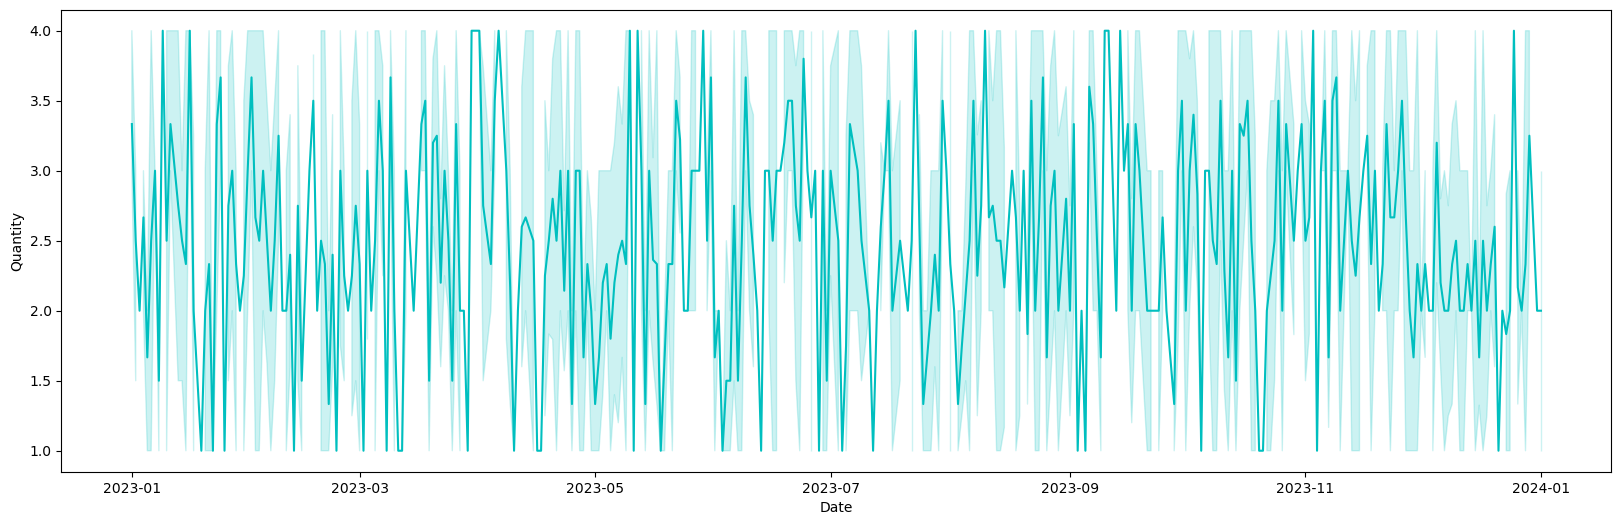

In [16]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x=df['Date'],y=df['Quantity'],color='c')
plt.show

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<function matplotlib.pyplot.show(close=None, block=None)>

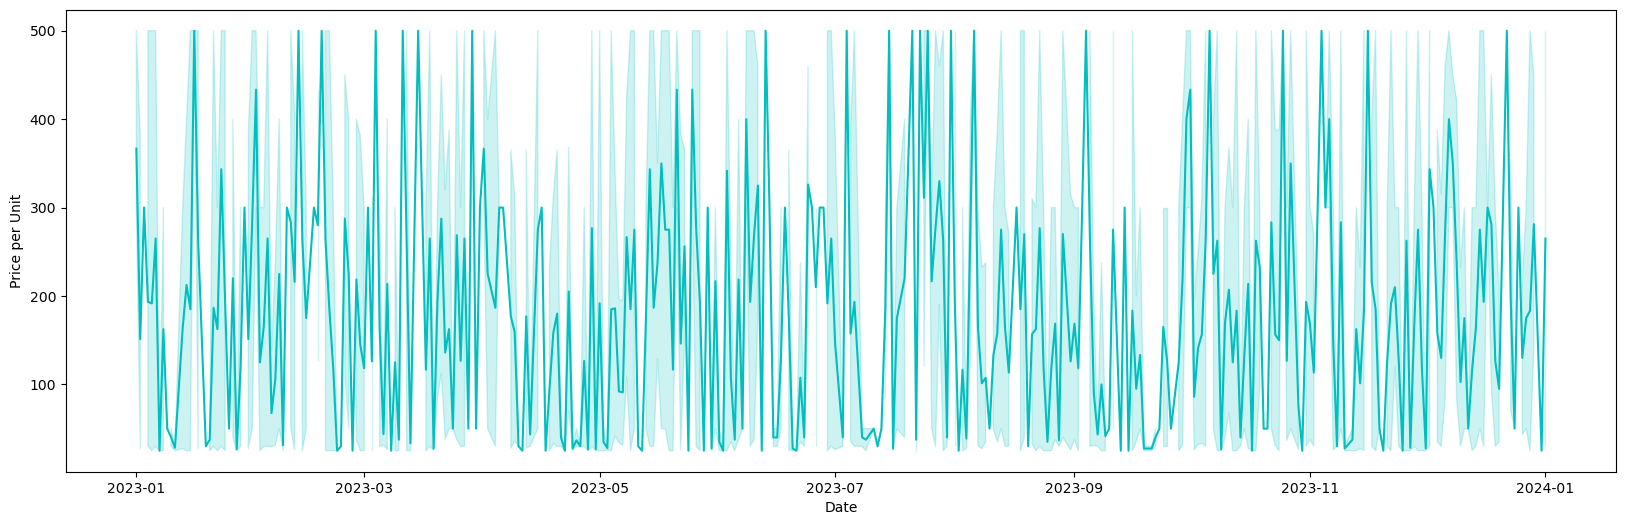

In [17]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x=df['Date'],y=df['Price per Unit'],color='c')
plt.show